## 01_IMPORTS

In [4]:
#General

import pandas as pd
import matplotlib.pyplot as plt


#Embeddings
import re
from nltk.corpus import stopwords
import keras
from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Model
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/flaviopfister/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 02 LOAD DATA

In [5]:
rating_df = pd.read_csv('01_Data/books_rating.csv')

In [6]:
rating_df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [7]:
# List of all columns
rating_df.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

array([[<Axes: title={'center': 'review/score'}>]], dtype=object)

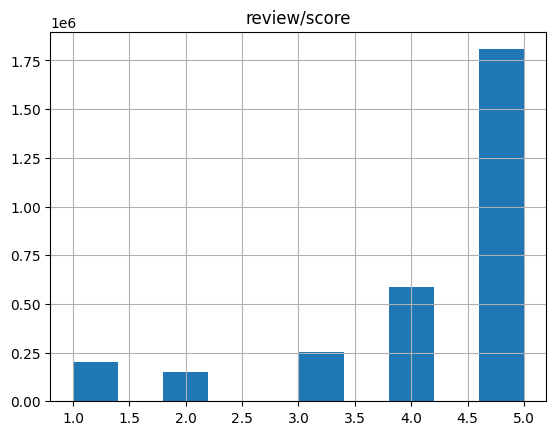

In [8]:
rating_df.hist('review/score')

In [29]:
books_df = pd.read_csv('01_Data/books_data.csv')
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [10]:
# get description of the book with index 1
books_df.loc[3, 'description']

'Julia Thomas finds her life spinning out of control after the death of her husband, Richard. Julia turns to her minister for comfort when she finds herself falling for him with a passion that is forbidden by the church. Heath Sparks is a man of God who is busy taking care of his quadriplegic wife who was seriously injured in a sever car accident. In an innocent effort to reach out to a lonely member of his church, Heath finds himself as the man and not the minister as Heath and Julia surrender their bodies to each other and face the wrath of God. Julia finds herself in over her head as she faces a deadly disease, the loss of her home and whispers about her wicked affair. Julia leaves the states offering her body as a living sacrifice in hopes of finding a cure while her heart remains thousands of miles away hoping to one day reunite with the man who holds it hostage.Whispers of the Wicked Saints is a once in a lifetime romance that is breath taking, defying all the rules of romance an

In [11]:
# Drop all rows with NaN values in the description column
# Word2Vec Tokenizer hat Probleme mit NaN Values

books_df = books_df.dropna(subset=['description'])
books_df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


In [12]:
# how many Nan values in the description column
books_df.description.isna().sum()

0

In [13]:
# fraction of Nan values in the description column
books_df.description.isna().sum() / len(books_df)


0.0

## Embedding of the description

In [68]:
df = pd.DataFrame({'text': ["Julia Thomas finds her life spinning out of control after the death of her husband, Richard. Julia turns to her minister for comfort when she finds herself falling for him with a passion that is forbidden by the church. Heath Sparks is a man of God who is busy taking care of his quadriplegic wife who was seriously injured in a sever car accident. In an innocent effort to reach out to a lonely member of his church, Heath finds himself as the man and not the minister as Heath and Julia surrender their bodies to each other and face the wrath of God. Julia finds herself in over her head as she faces a deadly disease, the loss of her home and whispers about her wicked affair. Julia leaves the states offering her body as a living sacrifice in hopes of finding a cure while her heart remains thousands of miles away hoping to one day reunite with the man who holds it hostage.Whispers of the Wicked Saints is a once in a lifetime romance that is breath taking, defying all the rules of romance and bending the laws of love.", "Another sentence.", "And a third one."]})


In [69]:
df

,text
0,Julia Thomas finds her life spinning out of co...
1,Another sentence.
2,And a third one.


In [70]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return tokens

df['processed_text'] = df['text'].apply(preprocess_text)

In [71]:
df

,text,processed_text
0,Julia Thomas finds her life spinning out of co...,"[julia, thomas, finds, life, spinning, control..."
1,Another sentence.,"[another, sentence]"
2,And a third one.,"[third, one]"


In [73]:
# Train Word2Vec model
model = Word2Vec(sentences=df['processed_text'], vector_size=100, window=5, min_count=1, sg=0)  # sg = 0 for CBOW, sg = 1 for skip-gram


In [74]:
def get_text_embedding(text):
    tokens = preprocess_text(text)
    embedding = []
    for token in tokens:
        if token in model.wv:
            embedding.append(model.wv[token])
    return sum(embedding) / len(embedding) if embedding else None

df['embeddings'] = df['text'].apply(get_text_embedding)

In [75]:
df

,text,processed_text,embeddings
0,Julia Thomas finds her life spinning out of co...,"[julia, thomas, finds, life, spinning, control...","[-0.0005435168, 0.0008790583, -0.000159568, 0...."
1,Another sentence.,"[another, sentence]","[0.0030553024, -0.002719168, 0.00058516674, 0...."
2,And a third one.,"[third, one]","[0.0008246605, 0.0022479205, 0.0036951376, -1...."


In [77]:
books_df['processed_desc'] = books_df['description'].apply(preprocess_text)

In [81]:
# Train Word2Vec model
model = Word2Vec(sentences=books_df['processed_desc'], vector_size=100, window=5, min_count=1, sg=0)  # sg = 0 for CBOW, sg = 1 for skip-gram

In [86]:
# Function to get the text embedding from the book descriptions

def get_text_embedding(text):
    tokens = preprocess_text(text)
    embedding = []
    for token in tokens:
        if token in model.wv:
            embedding.append(model.wv[token])
    return sum(embedding) / len(embedding) if embedding else None

books_df['embeddings'] = books_df['description'].apply(get_text_embedding)

In [87]:
books_df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,processed_desc,embeddings
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,"[philip, nel, takes, fascinating, look, key, a...","[-0.35528383, 0.31161073, -0.041549966, 0.5103..."
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,"[resource, includes, twelve, principles, under...","[-0.1480653, -0.64452076, -0.13215962, -0.3027..."
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,"[julia, thomas, finds, life, spinning, control...","[-1.2744929, -0.26509693, 1.2318112, -0.462519..."
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,"[church, christ, biblical, ecclesiology, today...","[0.21447034, -0.48086992, -0.17060585, -0.2400..."
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN,"[story, children, 10, st., hyacinth, dominican...","[-0.5868648, -0.021066764, 0.48399183, -0.2855..."
...,...,...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0,"[school, trip, ellis, island, dominick, avaro,...","[-1.4576176, 0.30339834, 0.83842486, -0.772673..."
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN,"[everyone, village, friedensdorf, happily, pre...","[-0.82504356, 0.1266477, 0.85221195, -0.283072..."
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN,"[give, mamaw, useful, beautiful, thoughtful, g...","[-0.67966425, 0.29081526, 0.10049067, 0.347693..."
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,"[alex-li, tandem, sells, autographs, business,...","[-0.8779723, 0.21024781, 0.33945814, 0.2078855..."


In [90]:
books_df.loc[3, 'infoLink']

'http://books.google.nl/books?id=aRSIgJlq6JwC&dq=Whispers+of+the+Wicked+Saints&hl=&source=gbs_api'

# Embedding mit Roberta

In [19]:
from transformers import AutoTokenizer, TFRobertaModel
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = TFRobertaModel.from_pretrained("roberta-base")

inputs = tokenizer("Hello, my dog is cute", return_tensors="tf")
outputs = model(inputs)

last_hidden_states = outputs.last_hidden_state

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [20]:
last_hidden_states.shape

TensorShape([1, 8, 768])

In [37]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=300, window=2, min_count=1, workers=4)

common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [38]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("my_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!

In [39]:
vector = model.infer_vector(['Julia Thomas finds her life spinning out of control after the death of her husband, Richard. Julia turns to her minister for comfort when she finds herself falling for him with a passion that is forbidden by the church. Heath Sparks is a man of God who is busy taking care of his quadriplegic wife who was seriously injured in a sever car accident. In an innocent effort to reach out to a lonely member of his church, Heath finds himself as the man and not the minister as Heath and Julia surrender their bodies to each other and face the wrath of God. Julia finds herself in over her head as she faces a deadly disease, the loss of her home and whispers about her wicked affair. Julia leaves the states offering her body as a living sacrifice in hopes of finding a cure while her heart remains thousands of miles away hoping to one day reunite with the man who holds it hostage.Whispers of the Wicked Saints is a once in a lifetime romance that is breath taking, defying all the rules of romance and bending the laws of love.'
])

In [40]:
vector

array([ 2.97777646e-04, -1.57564390e-03,  1.44826772e-03,  5.44143142e-04,
       -8.02386086e-04,  1.51958014e-03,  1.53569621e-03, -6.94773567e-04,
        1.41088630e-03, -1.43861177e-03, -1.56724278e-03,  1.41283032e-03,
        6.46873494e-04, -1.11184119e-04,  6.87201828e-05, -7.22995377e-04,
        6.19069760e-05, -1.65842532e-03,  3.46201472e-04, -8.67307186e-04,
        1.20707171e-03,  7.05915096e-04, -9.28406313e-04, -3.33794451e-04,
        6.28148497e-04,  1.30265253e-03, -1.53719308e-03,  1.34568312e-03,
       -1.03569706e-03,  1.26548868e-03, -1.35556259e-03,  1.74308021e-04,
        4.09940083e-04, -3.04834830e-04, -1.36386952e-03, -1.42736523e-03,
        1.01333461e-03,  2.75533006e-04, -1.67576276e-04, -1.62670319e-03,
       -1.40264817e-03, -2.00275186e-04, -3.26290930e-04,  2.53949576e-04,
       -6.90025801e-04,  1.88391801e-04, -6.40366401e-04, -5.59564432e-05,
        1.56237089e-04,  4.80149203e-04, -8.05357180e-04,  7.02645979e-04,
        1.48843939e-03,  

# Embeddings mit Doc2Vec

In [14]:
books_df.head(4)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0


In [15]:
# remove all NAN in description column
books_df = books_df.dropna(subset=['description'])

In [16]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [17]:
tagged_data = [TaggedDocument(words=word_tokenize(text.lower()), tags=[str(i)]) for i, text in enumerate(books_df['description'])]

In [18]:
model = Doc2Vec(vector_size=250, window=5, min_count=1, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [19]:
text_to_embed = 'Julia Thomas finds her life spinning out of control after the death of her husband, Richard. Julia turns to her minister for comfort when she finds herself falling for him with a passion that is forbidden by the church. Heath Sparks is a man of God who is busy taking care of his quadriplegic wife who was seriously injured in a sever car accident. In an innocent effort to reach out to a lonely member of his church, Heath finds himself as the man and not the minister as Heath and Julia surrender their bodies to each other and face the wrath of God. Julia finds herself in over her head as she faces a deadly disease, the loss of her home and whispers about her wicked affair. Julia leaves the states offering her body as a living sacrifice in hopes of finding a cure while her heart remains thousands of miles away hoping to one day reunite with the man who holds it hostage.Whispers of the Wicked Saints is a once in a lifetime romance that is breath taking, defying all the rules of romance and bending the laws of love.'
embeddings = model.infer_vector(word_tokenize(text_to_embed.lower()))

In [20]:
embeddings.shape

(250,)

In [21]:
similar_documents = model.docvecs.most_similar(positive=[embeddings])

/var/folders/p3/w0lx7sbn5pd85k9cmydlynhc0000gn/T/ipykernel_27001/2076206324.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_documents = model.docvecs.most_similar(positive=[embeddings])


In [22]:
similar_documents

[('2', 0.8685973286628723),
 ('53307', 0.4563717246055603),
 ('50126', 0.4425376355648041),
 ('72173', 0.42508721351623535),
 ('124547', 0.42370277643203735),
 ('112899', 0.42346057295799255),
 ('51500', 0.42195722460746765),
 ('7920', 0.4197424054145813),
 ('136989', 0.4191436171531677),
 ('111347', 0.41472336649894714)]

In [24]:
# Funktion, um Embeddings für jeden Text zu erhalten
def get_embedding(text):
    # Tokenisieren und Embedding abrufen
    tokens = word_tokenize(text.lower())
    return model.infer_vector(tokens)

# Fügen Sie eine neue Spalte hinzu, um die Embeddings zu speichern
books_df['embedding_NEW'] = books_df['description'].apply(get_embedding)

In [26]:
books_df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,embedding_NEW
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,"[-0.009502761, 0.06996235, -0.18814583, -0.799..."
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,"[-0.14334075, -0.048705406, 0.05226459, -0.179..."
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,"[0.14695325, 0.44210052, -0.31289113, 0.574333..."
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,"[0.2489677, 0.27385342, -0.093360126, -0.03919..."
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN,"[-0.04918821, 0.41271624, -0.38270834, -0.0454..."
...,...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0,"[0.30536807, -0.104055874, -0.109497614, 0.302..."
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN,"[0.25867572, -0.0700225, -0.20029627, 0.156340..."
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN,"[-0.20426334, -0.14376031, 0.008761077, -0.551..."
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,"[0.2440444, -0.2778673, 0.05399538, 0.25568792..."


In [27]:
# save the dataframe as a csv file
books_df.to_csv('01_Data/books_data_embeddings.csv', index=False)

In [30]:
# load the dataframe from the csv file
books_df = pd.read_csv('01_Data/books_data_embeddings.csv')

In [31]:
books_df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,embedding_NEW
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,[-0.00950276 0.06996235 -0.18814583 -0.799753...
1,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,[-0.14334075 -0.04870541 0.05226459 -0.179160...
2,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,[ 0.14695325 0.44210052 -0.31289113 0.574333...
3,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,[ 2.48967707e-01 2.73853421e-01 -9.33601260e-...
4,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN,[-4.9188212e-02 4.1271624e-01 -3.8270834e-01 ...
...,...,...,...,...,...,...,...,...,...,...,...
143957,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0,[ 0.30536807 -0.10405587 -0.10949761 0.302733...
143958,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN,[ 0.25867572 -0.0700225 -0.20029627 0.156340...
143959,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN,[-2.04263344e-01 -1.43760309e-01 8.76107719e-...
143960,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,[ 0.2440444 -0.2778673 0.05399538 0.255687...


In [42]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143962 entries, 0 to 143961
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          143962 non-null  object 
 1   description    143962 non-null  object 
 2   authors        141755 non-null  object 
 3   image          136957 non-null  object 
 4   previewLink    143962 non-null  object 
 5   publisher      125174 non-null  object 
 6   publishedDate  143546 non-null  object 
 7   infoLink       143962 non-null  object 
 8   categories     137888 non-null  object 
 9   ratingsCount   45127 non-null   float64
 10  embedding_NEW  143962 non-null  object 
dtypes: float64(1), object(10)
memory usage: 12.1+ MB


In [51]:
# get the embedding for the book with index 1
books_df.loc[1, 'embedding_NEW']


'[-0.14334075 -0.04870541  0.05226459 -0.17916054 -0.32123327  0.1540985\n  0.05772718 -0.22377263 -0.26567316 -0.11673813 -0.10791392  0.07801665\n -0.36817214 -0.08559573  0.5176416   0.20750158 -0.4173851   0.05269893\n  0.19586663  0.05242014 -0.3338352   0.0175929   0.22329848 -0.11958835\n -0.02094596  0.05287635 -0.3000532  -0.07761499  0.003974   -0.33437824\n -0.16112666  0.05163523  0.21515717  0.25753424 -0.04635359 -0.22276397\n -0.08147816  0.07994101  0.07849549 -0.04844518  0.38240087  0.3161369\n  0.02371158 -0.13496585 -0.07076647 -0.02675033 -0.17787153 -0.0623881\n -0.09443025 -0.09964689 -0.01780729 -0.34066418 -0.08275248 -0.1478942\n -0.19436163  0.28767937 -0.39279267 -0.0496091  -0.22870116 -0.05286461\n  0.2052042   0.10822672  0.02562542 -0.0013732   0.28746283  0.0612741\n -0.28703585 -0.42398015  0.04770559 -0.09719555  0.3653044  -0.14197417\n  0.4856494  -0.2566301  -0.1273508   0.17502134  0.2035599   0.2240925\n -0.35631433 -0.39773014 -0.23896684  0.264

In [45]:
text_to_embed = 'Julia Thomas finds her life spinning out of control after the death of her husband, Richard. Julia turns to her minister for comfort when she finds herself falling for him with a passion that is forbidden by the church. Heath Sparks is a man of God who is busy taking care of his quadriplegic wife who was seriously injured in a sever car accident. In an innocent effort to reach out to a lonely member of his church, Heath finds himself as the man and not the minister as Heath and Julia surrender their bodies to each other and face the wrath of God. Julia finds herself in over her head as she faces a deadly disease, the loss of her home and whispers about her wicked affair. Julia leaves the states offering her body as a living sacrifice in hopes of finding a cure while her heart remains thousands of miles away hoping to one day reunite with the man who holds it hostage.Whispers of the Wicked Saints is a once in a lifetime romance that is breath taking, defying all the rules of romance and bending the laws of love.'

embedding = get_embedding(text_to_embed)



In [57]:
import numpy as np

In [74]:
tokens = word_tokenize(text_to_embed.lower())
array = np.array(model.infer_vector(tokens))
 
#make a normal list out of the numpy array
list = array.tolist()

In [76]:
# add the list into the dataframe in an new column called 'embedding_TEST' in the row with index 2
books_df.loc[2, 'embedding_TEST'] = list

ValueError: Must have equal len keys and value when setting with an iterable

In [61]:
books_df

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,embedding_NEW
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,[-0.00950276 0.06996235 -0.18814583 -0.799753...
1,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,[-0.14334075 -0.04870541 0.05226459 -0.179160...
2,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,[ 0.14695325 0.44210052 -0.31289113 0.574333...
3,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,[ 2.48967707e-01 2.73853421e-01 -9.33601260e-...
4,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN,[-4.9188212e-02 4.1271624e-01 -3.8270834e-01 ...
...,...,...,...,...,...,...,...,...,...,...,...
143957,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0,[ 0.30536807 -0.10405587 -0.10949761 0.302733...
143958,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN,[ 0.25867572 -0.0700225 -0.20029627 0.156340...
143959,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN,[-2.04263344e-01 -1.43760309e-01 8.76107719e-...
143960,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0,[ 0.2440444 -0.2778673 0.05399538 0.255687...


In [73]:
# Beispiel-Datenrahmen erstellen
data = {'ID': [1, 2, 3],
        'Name': ['Alice', 'Bob', 'Charlie'],
        'Embedding': [list, np.array([4, 5, 6]), np.array([7, 8, 9])]}

df = pd.DataFrame(data)

# Anzeigen des DataFrame
df

,ID,Name,Embedding
0,1,Alice,"[0.2938048243522644, 0.34489133954048157, -0.1..."
1,2,Bob,"[4, 5, 6]"
2,3,Charlie,"[7, 8, 9]"
